In [1]:
# Load our required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api_key = 'INSERT API KEY HERE'

In [3]:
# Create a dictionary of active Opyn options with their respective contract addresses
# https://opyn.gitbook.io/opyn/abis-smart-contract-addresses
options = { "oWETHp Put $280 11/27/20": "0x73c2a775d0f1517701422b6f47413270099245de",
             "oWETHp Put $340 11/27/20": "0xbe57edba57748adf92dc9a391532ed8740fe9054",
             "oWETHp Put $440 11/27/20": "0x93db4d252a8f375c03e66faee84e88a90ad75aeb",
             "oETHc Call $400 11/27/20": "0xfc19b36158d9a004d3550b7f29ec57ec5ef2ddc9",
             "oWBTCc Call $16000 11/27/20": "0x9b5c2a33037b3f0ee5a864543b636d62387bb3ac",
             "oWBTCp Put $16000 11/27/20": "0x0414daf8966732a63bdf926d2fa29d73b468f516",
             "oYFIp Put $7000 11/27/20": "0x2862d540782b4a55da029440a7dd20b12f08707d",
             "oWETHp Put $460 12/4/20": "0x0376ae94db1bad7774eb2ba646ff61715b4b5d82",
             "oWETHp Put $360 12/25/20": "0xc6b11850241c5127eab73af4b6c68bc267cbbff4",
             "oWETHp Put $400 12/25/20": "0xbc1e2390d693ad617142500e3b7094606433c234",
             "oETHc Call $500 12/25/20": "0xb759e6731df19abd72e0456184890f87dcb6c518",
             "oETHc Call $640 12/25/20": "0x7eb6dd0cc2df2eae901f76a151ca82bb7be10d68",
             "oUNIp Put $3.5 12/25/20": "0x9e22b1c5804f7ac179b77de79a32e458a0ecb651",
             "oUNIc Call $4 12/25/20": "0xa8e65d1a3df5c0852f05cd1894b6196457e17c9c" }

In [4]:
# 'store' is used to temporarily save the option data
store = []
# Iterate through each option in the 'options' dictionary
for option in options.items():
    # Extract the first column (option name)
    name = option[0]
    # Extract the second column (option address)
    address = option[1]
    # For each Opyn option we call the API with its corresponding contract address
    url = "https://api.covalenthq.com/v1/1/address/"+str(address)+"/balances_v2/?&key="+str(api_key)
    # Request and extract the 'items' data field
    data = requests.get(url).json()['data']['items']
    # Iterate through each dictionary and add up the sum of the "quote" amount
    value_locked = sum([data[i]['quote'] for i in range(len(data))])
    # Save the option data to the 'store' list 
    store.append([name, address, value_locked])
    
# Convert the 'store' list into a dataframe and sort by the `value_locked` descending
df = pd.DataFrame(store).sort_values(2, ascending=False).reset_index().drop("index", axis=1)
df.columns = ['options', 'address', 'value_locked']    

In [5]:
df

,options,address,value_locked
0,oWETHp Put $360 12/25/20,0xc6b11850241c5127eab73af4b6c68bc267cbbff4,386071.60000
1,oWETHp Put $440 11/27/20,0x93db4d252a8f375c03e66faee84e88a90ad75aeb,281146.28000
2,oWETHp Put $400 12/25/20,0xbc1e2390d693ad617142500e3b7094606433c234,202162.00000
3,oWETHp Put $340 11/27/20,0xbe57edba57748adf92dc9a391532ed8740fe9054,201956.88000
4,oWBTCp Put $16000 11/27/20,0x0414daf8966732a63bdf926d2fa29d73b468f516,182748.10000
5,oWETHp Put $280 11/27/20,0x73c2a775d0f1517701422b6f47413270099245de,156685.70000
6,oUNIc Call $4 12/25/20,0xa8e65d1a3df5c0852f05cd1894b6196457e17c9c,138673.83000
7,oETHc Call $640 12/25/20,0x7eb6dd0cc2df2eae901f76a151ca82bb7be10d68,97360.62000
8,oETHc Call $500 12/25/20,0xb759e6731df19abd72e0456184890f87dcb6c518,94380.62500
9,oWETHp Put $460 12/4/20,0x0376ae94db1bad7774eb2ba646ff61715b4b5d82,86490.37500


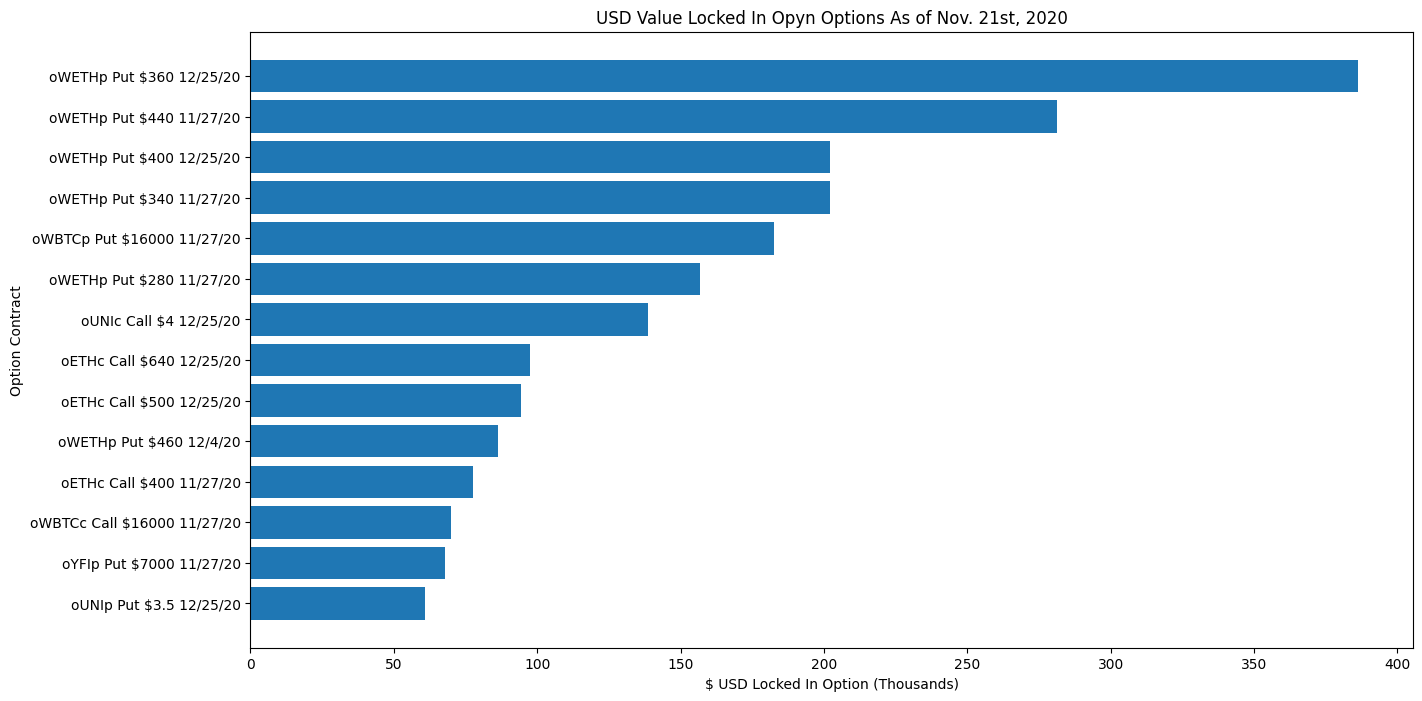

In [6]:
# Plot a horizontal bar chart
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
# Divide the value locked by 1,000 for easier visualization
plt.barh(df.options, df.value_locked/1000, align='center')
ax.set_yticks(df.options)
ax.set_yticklabels(df.options)
ax.invert_yaxis()
plt.xlabel("$ USD Locked In Option (Thousands)")
plt.ylabel("Option Contract")
plt.title("USD Value Locked In Opyn Options As of Nov. 21st, 2020");
plt.show()

In [7]:
# Around $2.1M locked in Opyn options
df.value_locked.sum()

2103886.57737